In [1]:
'''
Population data from FRED API

'''

import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
import numpy as np
import os
from dateutil import parser
from collections import defaultdict

In [2]:

def do_series_search(search_data):
    '''
    Does a search of FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_search_url = 'https://api.stlouisfed.org/fred/series/search?api_key=4a35874b8a4526dd50b390e46f396651&search_text={0}&file_type=json'  
    if type(search_data) != type(list):
        search_data = [search_data]
    search_string = '+'.join([x.lower() for x in search_data])
    print(search_string)
    fred_response = requests.get(fred_search_url.format(search_string))
    result = fred_response.json()
    return result
    
def get_series(series_id):
    '''
    Fetches FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_series_fetch_url = 'https://api.stlouisfed.org/fred/series/observations?series_id={0}' + \
'&api_key=4a35874b8a4526dd50b390e46f396651&file_type=json'
    fred_response = requests.get(fred_series_fetch_url.format(series_id))
    result = fred_response.json()
    #print(result)
    return result 


def get_population_data(country):
    '''
    Get Poplatation data from FRED
    INPUT: Country (String)
    OUTPUT: dictionary of data 
    '''
    population_titles_of_interest = [
    'Employment to Population Ratio for',
    'Age Dependency Ratio: Older Dependents to Working-Age Population for',
    'Population Ages 15 to 64 for',
    'Population, Total for',
    'Population'
    ]

    search_string = country.lower()
    
    country_series  = do_series_search(search_string)
    series_ids = {}
    series_notes = {}
    #print(country_series)

    for elem in country_series['seriess']:
        #print(elem)
        for title in population_titles_of_interest:
            #if elem['title'].startswith(title):
            if 'population' in elem['title'].lower():
                series_ids[elem['title']] = elem['id']
                series_notes[elem['title']] = elem['notes']
    print(series_ids)
    ans = {}
    for title, series_id in series_ids.items():
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[title] = series
    
    return ans


def get_series_info_by_title(title, country):
    '''
    Get series data by specific title
    INPUT: title (str) 
            country (str)
    OUTPUT: series info
    
    '''
    print(title)
    print(country)
    save_country = country
    if country.lower() == 'south korea':
        country = 'republic of korea'
    country_series  = do_series_search(country.lower())
    series_ids = {}
    series_notes = {}
    for elem in country_series['seriess']:
        print(elem['title'] ,elem['frequency'], elem['id'])
        #print(elem)
        if title.lower() == elem['title'].lower():
            if 'frequency' in elem:
                if elem['frequency'].lower() == 'annual':
                    print('found one {0}'.format(title))
                    print(elem)
                    series_ids[elem['title']] = elem['id']
                    series_notes[elem['title']] = elem['notes']
    print('series ids', series_ids)
    ans = {}
    # For some reason cannot generically find us data
    # series_id['population, total for united states'] = 'POPTOTUSA647NWDB'
    # series_notes = {'title':'population, total for united states'}
    for title, series_id in series_ids.items():
        print('search1', title, series_id)
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[save_country] = series
    return ans
    

        
                
    
    
    

In [3]:
'''
These do not work as the titles vary by country

'''

def get_total_population_data_for_counry_set(country_set):
    '''
    Get total population
    
    '''
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population for {0}'.format(country)
        if country.lower() in {'usa', 'united states'}:
            title_string = 'population' 
        print(title_string)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data


'''


'''
def get_working_age_percent_for_country_set(country_set):
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population ages 15 to 64 for {0}'.format(country)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data
    
    
    

In [4]:
this_set = get_total_population_data_for_counry_set(['United States'])





population
population
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
China / U.S. Foreign Exchange Rate Daily DEXCHUS
Ch

Household Debt to GDP for United States Quarterly HDTGPDUSQ163N
Treasury and Agency Securities, All Commercial Banks Monthly USGSEC
20-Year Treasury Constant Maturity Rate Daily DGS20
Gross Fixed Capital Formation in United States Quarterly USAGFCFQDSMEI
All Employees, Manufacturing Monthly CEU3000000001
Motor Vehicle Retail Sales: Heavy Weight Trucks Monthly HTRUCKSSA
20-Year Treasury Constant Maturity Rate Monthly GS20
Monthly Supply of Houses in the United States Monthly MSACSR
Nonfinancial corporate business; debt securities; liability, Level Quarterly NCBDBIQ027S
10-Year High Quality Market (HQM) Corporate Bond Spot Rate Monthly HQMCB10YR
Treasury and Agency Securities, All Commercial Banks Weekly, Ending Wednesday TASACBW027SBOG
Motor Vehicle Retail Sales: Heavy Weight Trucks Monthly HTRUCKSNSA
Commercial and Industrial Loans, Large Domestically Chartered Commercial Banks Weekly, Ending Wednesday CIBOARD
Natural Rate of Unemployment (Long-Term) Quarterly NROU
Unemployment Rate - 

Global price of Rubber Quarterly PRUBBUSDQ
Federal Funds Target Range - Lower Limit Daily, 7-Day DFEDTARL
Federal government current tax receipts Annual W006RC1A027NBEA
ICE BofA AA US Corporate Index Effective Yield Daily, Close BAMLC0A2CAAEY
Overnight Bank Funding Rate Daily OBFR
Total Consumer Credit Owned and Securitized, Outstanding Monthly, End of Period TOTALSL
Gross National Product Quarterly A001RP1Q027SBEA
Gross National Product Annual A001RP1A027NBEA
Industrial Production: Manufacturing (NAICS) Monthly IPMAN
Effective Federal Funds Volume Daily EFFRVOL
Wilshire 5000 Full Cap Price Index Daily, Close WILL5000PRFC
M1 for the United States Monthly MANMM101USM657S
Existing Home Sales Monthly EXHOSLUSM495S
1-Year Treasury Bill: Secondary Market Rate Monthly TB1YR
Total Unemployed, Plus All Persons Marginally Attached to the Labor Force, Plus Total Employed Part Time for Economic Reasons, as a Percent of the Civilian Labor Force Plus All Persons Marginally Attached to the Labor For

S&P/Case-Shiller AZ-Phoenix Home Price Index Monthly PHXRSA
Personal Consumption Expenditures: Nondurable Goods Monthly PCEND
Net domestic investment: Private: Domestic business Annual W790RC1A027NBEA
Producer Price Index by Industry: Total Manufacturing Industries Monthly PCUOMFGOMFG
Producer Price Index by Industry: Industrial Sand Mining: Hydraulic Fracturing Sand Monthly PCU21232221232291
Population Level Monthly CNP16OV
Nonperforming Total Loans (past due 90+ days plus nonaccrual) to Total Loans Quarterly, End of Period NPTLTL
Return on Average Equity for all U.S. Banks Quarterly, End of Period USROE
Median Sales Price for New Houses Sold in the United States Monthly MSPNHSUS
Unemployment Rate - Women Monthly LNS14000002
Average Weekly Hours of All Employees, Total Private Monthly AWHAETP
Return on Average Assets for all U.S. Banks Quarterly, End of Period USROA
5-Year High Quality Market (HQM) Corporate Bond Spot Rate Monthly HQMCB5YR
Consumer Price Index for All Urban Wage Earne

In [5]:
this_set

{'United States': {'United States': {'title': 'Population',
   'units': 'lin',
   'notes': 'Population includes resident population plus armed forces overseas. The annual estimate is constructed as an average of monthly series https://fred.stlouisfed.org/series/POPTHM. \nBEA Account Code: B230RC',
   'dates': ['1929-01-01',
    '1930-01-01',
    '1931-01-01',
    '1932-01-01',
    '1933-01-01',
    '1934-01-01',
    '1935-01-01',
    '1936-01-01',
    '1937-01-01',
    '1938-01-01',
    '1939-01-01',
    '1940-01-01',
    '1941-01-01',
    '1942-01-01',
    '1943-01-01',
    '1944-01-01',
    '1945-01-01',
    '1946-01-01',
    '1947-01-01',
    '1948-01-01',
    '1949-01-01',
    '1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '196

In [6]:
country_set = ['China', 'Japan', 'Republic of Korea', 'Germany', 'United States']

In [7]:
total_population_set = get_total_population_data_for_counry_set(country_set)

population for china
population for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
M1 for China Monthly MANMM101CNM189S
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
M1 for China Monthly MANMM101CNM189N
M1 for China Annual MANMM101CNA189S
M1 for China Annual MANMM101CNA657S
M1 for China Monthly MANMM101CNM657S
M1 for China Annual MANMM101CNA189N
M1 for China Quarterly MANMM101CNQ189N
M1 for China Quarterly MANMM101CNQ657S
M1 for China Quarterly MANMM101CN

Life Expectancy at Birth, Total for China Annual SPDYNLE00INCHN
Goods, Value of Exports for China Monthly VALEXPCNM052N
Population for China Annual POPTTLCNA148NRUG
found one population for china
{'id': 'POPTTLCNA148NRUG', 'realtime_start': '2020-03-12', 'realtime_end': '2020-03-12', 'title': 'Population for China', 'observation_start': '1952-01-01', 'observation_end': '2017-01-01', 'frequency': 'Annual', 'frequency_short': 'A', 'units': 'Millions of Persons', 'units_short': 'Mil. of Persons', 'seasonal_adjustment': 'Not Seasonally Adjusted', 'seasonal_adjustment_short': 'NSA', 'last_updated': '2019-06-11 13:12:34-05', 'popularity': 6, 'group_popularity': 6, 'notes': 'Source ID: pop\n\nWhen using these data in your research, please make the following reference: Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt\n\nFor more information, see

Insurance Company Assets to GDP for China Annual DDDI11CNA156NWDB
Outstanding International Public Debt Securities to GDP for China Annual DDDM06CNA156NWDB
Credit to Private Non-Financial Sector by Domestic Banks, Adjusted for Breaks, for China Quarterly, End of Quarter CRDQCNBPABIS
Value of Exports to China from California Annual CACHNA052SCEN
Amounts Outstanding of International Debt Securities for All Issuers, All Maturities, Nationality of Issuer in China Quarterly IDSGAMNIAOCN
Mobile Cellular Subscriptions in China Annual ITCELSETSP2CHN
Total Factor Productivity Level at Current Purchasing Power Parities for Province of China Taiwan Annual CTFPPPTWA669NRUG
Price level of Output-side Real GDP at Current Purchasing Power Parities (Purchasing Power Parity/Exchange Rate) for China Annual PLGDPOCNA670NRUG
Financial Account (Excludes Exceptional Financing and Use of Fund Resources), Net for China Annual FAEEFNCNA052N
Amount Outstanding Due within One Year of International Debt Securitie

Share of Labour Compensation in GDP at Current National Prices for Province of China Taiwan Annual LABSHPTWA156NRUG
Share of Household Consumption at Current Purchasing Power Parities for Province of China Taiwan Annual CSHCCPTWA156NRUG
Use of Financial Services, Assets: Outstanding Loans to Households at Commercial Banks for China, P.R.: Macao Annual MACFCSODCHXDC
Current Account Balance: Total Transfers for China (DISCONTINUED) Quarterly BPBLTF01CNQ637N
Current Account Balance: Total Transfers for China (DISCONTINUED) Annual BPBLTF01CNA637S
Current Account Balance: Total Transfers for China (DISCONTINUED) Annual BPBLTF01CNA637N
Current Account Balance: Total Transfers for China (DISCONTINUED) Quarterly BPBLTF01CNQ637S
Balance of payments BPM6: Current account Debits: Services: Total Debits as % of Current account for China Quarterly CHNB6DBSE02STSAQ
Price Level of the Capital Stock for Province of China Taiwan Annual PLKCPPTWA670NRUG
Current Account Credit: Total Income for China (DI

Use of Financial Services, Liabilities: Outstanding Deposits at Commercial Banks for China, P.R.: Hong Kong Annual HKGFCLODCXDC
Number of Identified Exporters to China from Montana Annual MTCHNA475SCEN
Number of Identified Exporters to China from Louisiana Annual LACHNA475SCEN
Value of Exports to Province of China Taiwan from Puerto Rico Annual PRTWNA052SCEN
Number of Identified Exporters to Province of China Taiwan from South Carolina Annual SCTWNA475SCEN
Number of Identified Exporters to Province of China Taiwan from Minnesota Annual MNTWNA475SCEN
Value of Exports to China from Georgia Annual GACHNA052SCEN
Use of Financial Services Deposit Accounts: Non-life Insurance Accounts at Insurance Corporations for China, P.R.: Macao Annual MACFCAOFILNNUM
Use of Financial Services, Liabilities: Outstanding Deposits for Life Insurance at Insurance Corporations for China, P.R.: Mainland Annual CHNFCLOFILPXDC
Value of Exports to Province of China Taiwan from Massachusetts Annual MATWNA052SCEN
Cu

Use of Financial Services Deposit Accounts: Accounts at Credit Unions and Financial Cooperatives for China, P.R.: Mainland Annual CHNFCAODUNUM
Number of Identified Exporters to China from Maine Annual MECHNA475SCEN
Net Issues of International Money Market instruments for All Issuers, Residence of Issuer in China (DISCONTINUED) Quarterly IMMIRINICN
Use of Financial Services Deposit Accounts: Accounts at Other Depository Corporations for China, P.R.: Mainland Annual CHNFCAODNUM
Use of Financial Services, Liabilities: Outstanding Deposits at Insurance Corporations for China, P.R.: Hong Kong Annual HKGFCLOFIXDC
Use of Financial Services Deposit Accounts: Life Insurance Accounts at Insurance Corporations for China, P.R.: Macao Annual MACFCAOFILPNUM
Use of Financial Services: Number of Depositors which are Households at Other Deposit Takers for China, P.R.: Mainland Annual CHNFCDODDHPENUM
Geographical Outreach: Number of Institutions, Other Depository Corporations, Other Deposit Takers for C

Exports of Goods and Services in Japan Quarterly JPNEXPORTQDSNAQ
Exports of Goods and Services in Japan Quarterly JPNEXPORTQDSMEI
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Japan Quarterly, End of Quarter QJPNAMUSDA
Early Estimate of Quarterly ULC Indicators: Total Labor Productivity for Japan Quarterly ULQELP01JPQ657S
Imports: Value Goods for Japan Quarterly XTIMVA01JPQ667S
Imports: Value Goods for Japan Annual XTIMVA01JPA667S
Early Estimate of Quarterly ULC Indicators: Total Labor Productivity for Japan Quarterly ULQELP01JPQ661N
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Japan Quarterly, End of Quarter CRDQJPANABIS
Imports: Value Goods for Japan Annual XTIMVA01JPA188S
Imports: Value Goods for Japan Monthly XTIMVA01JPM664N
Imports: Value Goods for Japan Monthly XTIMVA01JPM664S
Imports: Value Goods for Japan Quarterly XTIMVA01JPQ664S
Imports: Value Goods for Japan Annual XTIMVA01JPA664S
Imports: Value Goods for Japan Quarterly XTIMVA0

Monthly Overtime Hours: Manufacturing for Japan Quarterly HOOVMN03JPQ661N
Real Exports of Goods and Services for Japan Quarterly JPNRGDPEGS
Projection of General government gross debt for Japan Annual GGGDTPJPA188N
Trade Weighted U.S. Dollar Index: Major Currencies, Goods (DISCONTINUED) Annual TWEXMANL
Bank Regulatory Capital to Risk-Weighted Assets for Japan Annual DDSI05JPA156NWDB
Consumer Price Index: Housing, water, electricity, gas and other fuels (COICOP 04): Actual rentals for housing: Total for Japan Monthly JPNCP040100GPM
Real Effective Exchange Rates Based on Manufacturing Unit Labor Cost for Japan Quarterly CCRETT02JPQ661N
Output in Manufacturing in Japan (DISCONTINUED) Annual JPNOTPT
Barro-Lee: Population age 25+ with tertiary schooling. Total (Incomplete and Completed Tertiary) for Japan 5 Year BARTERICMP25UPZSJPN
Bank Z-Score for Japan Annual DDSI01JPA645NWDB
Use of Financial Services, Assets: Outstanding Loans at Commercial Banks for Japan Annual JPNFCSODCXDC
Liquid Asse

Benchmarked Unit Labor Costs - Construction for Japan (DISCONTINUED) Quarterly ULQBBU04JPQ661N
Benchmarked Unit Labor Costs - Construction for Japan (DISCONTINUED) Quarterly ULQBBU04JPQ661S
Benchmarked Unit Labor Costs - Construction for Japan (DISCONTINUED) Annual ULQBBU04JPA662N
Benchmarked Unit Labor Costs - Construction for Japan (DISCONTINUED) Annual ULQBBU04JPA661N
Benchmarked Unit Labor Costs - Construction for Japan (DISCONTINUED) Quarterly JPNULCCONQPNMEI
Production: Industry: Total industry: Total industry excluding construction for Japan Monthly JPNPRINTO01GPSAM
Production: Industry: Total industry: Total industry excluding construction for Japan Monthly JPNPRINTO01IXOBM
Production: Industry: Total industry: Total industry excluding construction for Japan Monthly JPNPRINTO01GYSAM
Producer Prices Index: Economic activities: Industrial activities: Domestic for Japan Monthly JPNPIEATI02GYM
Producer Prices Index: Economic activities: Industrial activities: Domestic for Japan Mon

Unemployment Rate: Aged 15-64: Males for Japan Quarterly LRUN64MAJPQ156S
Unemployment Rate: Aged 15-64: Males for Japan Monthly LRUN64MAJPM156S
Unemployment Rate: Aged 15-64: Males for Japan Annual LRUN64MAJPA156S
Unemployment Rate: Aged 15-64: Males for Japan Quarterly LRUN64MAJPQ156N
Unemployment Rate: Aged 15-64: Males for Japan Annual LRUN64MAJPA156N
Unemployment Rate: Aged 15-74: All Persons for Japan Monthly LRUN74TTJPM156N
Unemployment Rate: Aged 15-74: All Persons for Japan Monthly LRUN74TTJPM156S
Unemployment Rate: Aged 15-74: All Persons for Japan Annual LRUN74TTJPA156N
Unemployment Rate: Aged 15-74: All Persons for Japan Quarterly LRUN74TTJPQ156S
Unemployment Rate: Aged 15-74: All Persons for Japan Annual LRUN74TTJPA156S
Activity Rate: Aged 55-64: All Persons for Japan Monthly LRAC55TTJPM156S
Activity Rate: Aged 55-64: All Persons for Japan Annual LRAC55TTJPA156S
Exchange Rate Adjusted Changes of Domestic Debt Securities for General Government Issuers, All Maturities, Reside

Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ659S
Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ661S
Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ661N
Early Estimate of Quarterly ULC Indicators: Total for the Republic of Korea Quarterly ULQEUL01KRQ657S
Monthly Earnings: Private Sector for the Republic of Korea Quarterly LCEAPR03KRQ189S
Monthly Earnings: Private Sector for the Republic of Korea Annual LCEAPR03KRA189N
Monthly Earnings: Private Sector for the Republic of Korea Annual LCEAPR03KRA661S
Monthly Earnings: Private Sector for the Republic of Korea Quarterly LCEAPR03KRQ661S
Monthly Earnings: Private Sector for the Republic of Korea Quarterly LCEAPR03KRQ189N
Goods, Value of Exports for Republic of Korea Monthly VALEXPKRM052N
Goods, Value of Exports for Republic of Korea Quarterly VALEXPKRQ052N
Change in Stocks in Korea Annual KO

Share of Gross Capital Formation at Current Purchasing Power Parities for Republic of Korea Annual CSHICPKRA156NRUG
Monetary aggregates and their components: Broad money and components: M3: M3 for the Republic of Korea Monthly KORMABMM301IXOBSAM
Monetary aggregates and their components: Broad money and components: M3: M3 for the Republic of Korea Monthly KORMABMM301GYSAM
Monetary aggregates and their components: Broad money and components: M3: M3 for the Republic of Korea Quarterly KORMABMM301GYSAQ
Monetary aggregates and their components: Broad money and components: M3: M3 for the Republic of Korea Quarterly KORMABMM301IXOBSAQ
Price Level of Capital Formation for Republic of Korea Annual PLICPPKRA670NRUG
Exchange Rates (Value of Foreign Currency Relative to U.S. Dollar) in the Republic of Korea (South Korea) (DISCONTINUED) Annual KOFXUS
Financial Account: Portfolio Investment Assets for the Republic of Korea (DISCONTINUED) Quarterly BPFAPI02KRQ637N
Price Level of Investment for Republ

Employment Rate: Aged 15 and Over: Females for the Republic of Korea Annual LREMTTFEKRA156S
Employment Rate: Aged 15 and Over: Females for the Republic of Korea Annual LREMTTFEKRA156N
Employment Rate: Aged 15 and Over: Females for the Republic of Korea Quarterly LREMTTFEKRQ156N
Employment Rate: Aged 15 and Over: Females for the Republic of Korea Quarterly LREMTTFEKRQ156S
Employment Rate: Aged 15 and Over: Females for the Republic of Korea Monthly LREMTTFEKRM156N
Employment Rate: Aged 15 and Over: Females for the Republic of Korea Monthly LREMTTFEKRM156S
Employment Rate: Aged 55-64: All Persons for the Republic of Korea Monthly LREM55TTKRM156S
Employment Rate: Aged 55-64: All Persons for the Republic of Korea Quarterly LREM55TTKRQ156N
Employment Rate: Aged 55-64: All Persons for the Republic of Korea Monthly LREM55TTKRM156N
Total Production of Investment Goods for Manufacturing for the Republic of Korea Quarterly PRMNVG01KRQ661S
Total Production of Investment Goods for Manufacturing for

population for germany
population for germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemployment Rate for Ger

Geographical Outreach: Key Indicators ATMs Per 1000 Km2 for Germany Annual DEUFCAKNUM
Gross Domestic Product (Euro/ECU series) for Germany Quarterly CPMEURNSAB1GQDE
Hourly Earnings: Private Sector for Germany Quarterly LCEAPR01DEQ661S
Production: Energy: Production and distribution of electricity, gas, steam and air conditioning: Total for Germany Quarterly DEUPREND401IXOBSAQ
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDENAM770A
Production: Industry: Total industry: Total industry excluding construction for Germany Monthly DEUPRINTO01GYSAM
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for Germany Monthly CPGREN01DEM657N
Capital Accounts: Total Net Capital Account for Germany (DISCONTINUED) Quarterly BPCATT01DEQ636N
Real Effective Exchange Rates Based on Manufacturing Unit Labor Cost for Germany Annual CCRETT02DEA661N
Real Effective Exchange Rates Based on Manufacturing Unit Labor Cost for Germany Quarterly

Inactivity Rate: Aged 25-54: All Persons for Germany Quarterly LRIN25TTDEQ156S
Leading Indicators OECD: Leading indicators: CLI: Trend restored for Germany Monthly DEULOLITOTRSTSAM
Leading Indicators OECD: Leading indicators: CLI: Normalised for Germany Monthly DEULOLITONOSTSAM
Harmonized Index of Consumer Prices: Combined Passenger Transport for Germany (including former GDR from 1991) Monthly CP0735DEM086NEST
Amount Outstanding of International Debt Securities for Issuers in Non-Financial Corporations (Corporate Issuers), All Maturities, Residence of Issuer in Germany Quarterly IDSNFAMRIAODE
Working Age Population: Aged 25-54: All Persons for Germany Quarterly LFWA25TTDEQ647S
Employment Rate: Aged 25-54: Males for Germany Annual LREM25MADEA156S
Wholesale Price of Wheat for Berlin, Germany Monthly M04003DE00BERM372NNBR
Liquid Assets to Deposits and Short Term Funding for Germany Annual DDSI06DEA156NWDB
Barro-Lee: Population age 25+ with tertiary schooling. Total (Incomplete and Comple

Producer Prices Index: Investments Goods: Total for Germany Monthly PITGVG01DEM661N
Producer Prices Index: Investments Goods: Total for Germany Annual PITGVG01DEA661N
Producer Prices Index: Investments Goods: Total for Germany Quarterly PITGVG01DEQ661N
Harmonized Index of Consumer Prices: Beer for Germany (including former GDR from 1991) Monthly CP0213DEM086NEST
Coal Production for Germany Annual A0117ADEA422NNBR
Coal Production for Germany Annual A0117BDEA422NNBR
Unemployment Rate: Aged 15 and Over: Males for Germany Quarterly LRUNTTMADEQ156S
Unemployment Rate: Aged 15 and Over: Males for Germany Quarterly LRUNTTMADEQ156N
Unemployment Rate: Aged 15 and Over: Males for Germany Annual LRUNTTMADEA156N
Price Level of the Capital Stock for Germany Annual PLKCPPDEA670NRUG
Business Tendency Surveys for Manufacturing: Production: Tendency: European Commission and National Indicators for Germany Monthly BSPRTE02DEM460S
Activity Rate: Aged 25-54: Females for Germany Annual LRAC25FEDEA156S
Activ

Consumer Price Index: Clothing and footwear (COICOP 03): Total: Total for Germany Quarterly DEUCP030000GPQ
Consumer Price Index: Clothing and footwear (COICOP 03): Total: Total for Germany Quarterly DEUCP030000GYQ
Loans from Non-Resident Banks, Net, to GDP for Germany Annual DDOI08DEA156NWDB
Business Tendency Surveys for Manufacturing: Orders Inflow: Tendency: European Commission Indicator for Germany Monthly BSOITE02DEM460S
Business Tendency Surveys for Manufacturing: Orders Inflow: Tendency: European Commission Indicator for Germany Quarterly BSOITE02DEQ460S
Business Tendency Surveys for Services: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Germany Monthly BVCICP02DEM460S
Harmonized Unemployment: Aged 15-24: All Persons for Germany Quarterly LRHU24TTDEQ156S
Harmonized Unemployment: Aged 15-24: All Persons for Germany Quarterly LRHU24TTDEQ156N
Harmonized Unemployment: Aged 15-24: All Persons for Germany Monthly LRHU24TTDEM156N
Harmonize

Producer Price Index by Commodity for Metals and Metal Products: Cold Rolled Steel Sheet and Strip Monthly WPU101707
Civilian Labor Force Level Monthly CLF16OV
Nonfinancial corporate business; debt securities and loans; liability, Level Quarterly, End of Period BCNSDODNS
Population Annual B230RC0A052NBEA
found one population
{'id': 'B230RC0A052NBEA', 'realtime_start': '2020-03-12', 'realtime_end': '2020-03-12', 'title': 'Population', 'observation_start': '1929-01-01', 'observation_end': '2019-01-01', 'frequency': 'Annual', 'frequency_short': 'A', 'units': 'Thousands', 'units_short': 'Thous.', 'seasonal_adjustment': 'Not Seasonally Adjusted', 'seasonal_adjustment_short': 'NSA', 'last_updated': '2020-01-30 08:07:51-06', 'popularity': 48, 'group_popularity': 67, 'notes': 'Population includes resident population plus armed forces overseas. The annual estimate is constructed as an average of monthly series https://fred.stlouisfed.org/series/POPTHM. \nBEA Account Code: B230RC'}
MZM Money Sto

Loans and Leases in Bank Credit, All Commercial Banks Quarterly LLBACBQ158SBOG
Health Expenditures Annual HLTHSCEXPHCSA
Freight Transportation Services Index Monthly TSIFRGHT
Term Premium on a 10 Year Zero Coupon Bond Daily THREEFYTP10
Total Business Inventories Monthly, End of Period BUSINV
Total Construction Spending: Nonresidential Monthly TLNRESCONS
4-Week Treasury Bill: Secondary Market Rate Daily DTB4WK
ICE BofA Single-A US Corporate Index Effective Yield Daily, Close BAMLC0A3CAEY
Assets: Other: Repurchase Agreements: Maturing Within 15 Days: Wednesday Level Weekly, As of Wednesday REP15
Loans and Leases in Bank Credit, All Commercial Banks Monthly H8B1020NCBCMG
Moody's Seasoned Baa Corporate Bond Minus Federal Funds Rate Daily BAAFF
S&P/Case-Shiller IL-Chicago Home Price Index Monthly CHXRNSA
6-Month Treasury Bill: Secondary Market Rate Weekly, Ending Friday WTB6MS
Chicago Fed National Financial Conditions Leverage Subindex Weekly, Ending Friday NFCILEVERAGE
Bank Credit, All Com

S&P/Case-Shiller CO-Denver Home Price Index Monthly DNXRNSA
Average Weekly Hours of All Employees, Total Private Monthly CEU0500000002
Unemployment Rate: Aged 15-64: All Persons for the United States Annual LRUN64TTUSA156N
Primary Credit Rate Monthly MPCREDIT
Consumer Price Index for All Urban Consumers: New Vehicles in U.S. City Average Semiannual CUUS0000SETA01
Federal government budget surplus or deficit (-) Quarterly M318501Q027NBEA
Federal government budget surplus or deficit (-) Annual M318501A027NBEA
Large Time Deposits, All Commercial Banks Monthly LTDACBM027NBOG
Gross private saving Annual A126RC1A027NBEA
Industrial Production: Electric and gas utilities Quarterly IPG2211A2SQ
E-Commerce Retail Sales Quarterly ECOMNSA
Industrial Production: Electric and gas utilities Quarterly IPG2211A2NQ
Total Checkable Deposits Weekly, Ending Monday TCD
US Regular All Formulations Gas Price Monthly, End of Period GASREGM
Large Time Deposits, All Commercial Banks Weekly, Ending Wednesday LTDAC

In [8]:

total_population_set

{'China': {'China': {'title': 'Population for China',
   'units': 'lin',
   'notes': 'Source ID: pop\n\nWhen using these data in your research, please make the following reference: Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt\n\nFor more information, see http://www.rug.nl/research/ggdc/data/pwt/.',
   'dates': ['1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-0

In [9]:
working_population_set = get_working_age_percent_for_country_set(country_set)

population ages 15 to 64 for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
M1 for China Monthly MANMM101CNM189S
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
M1 for China Monthly MANMM101CNM189N
M1 for China Annual MANMM101CNA189S
M1 for China Annual MANMM101CNA657S
M1 for China Monthly MANMM101CNM657S
M1 for China Annual MANMM101CNA189N
M1 for China Quarterly MANMM101CNQ189N
M1 for China Quarterly MANMM101CNQ657S
M1 for China Quarterly MANMM101CNQ189S
C

Total Credit to Non-Financial Corporations, Adjusted for Breaks, for China Quarterly, End of Quarter QCNNAM770A
Total Credit to Households and NPISHs, Adjusted for Breaks, for China Quarterly, End of Quarter QCNHAM770A
Consumer Price Index: Total Food Including Restaurants for China Monthly CPGDFD01CNM661N
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for China Quarterly, End of Quarter CRDQCNANABIS
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for China Quarterly, End of Quarter QCNNAMUSDA
Consumer Price Index: Total Food Including Restaurants for China Quarterly CPGDFD01CNQ661N
Consumer Price Index: Total Food Including Restaurants for China Annual CPGDFD01CNA661N
Total Credit to Households and NPISHs, Adjusted for Breaks, for China Quarterly, End of Quarter QCNHAMUSDA
Projection of General government gross debt for Province of China Taiwan Annual GGGDTPTWA188N
Projection of General government net lending/borrowing for Province of China Taiwan An

Purchasing Power Parity Converted GDP Laspeyres per worker for China Annual RGDPLWCNA627NUPN
Openness at Current Prices for China Annual OPENCPCNA156NUPN
Projection of General government net lending/borrowing for China Annual GGNLBPCNA188N
Import Price Index: Household and institutional furniture and kitchen cabinet manufacturing for China Monthly COCHNZ3371
Narrow Money, Index for China (DISCONTINUED) Monthly MANMNM01CNM657S
Narrow Money, Index for China (DISCONTINUED) Monthly MANMNM01CNM661S
Import Price Index: Plastics product manufacturing for China Monthly COCHNZ3261
Balance of payments BPM6: Current account Debits: Services: Total Debits for China Quarterly CHNB6DBSE01CXCUSAQ
Outstanding International Private Debt Securities to GDP for China Annual DDDM05CNA156NWDB
Total Credit to Households and Non-Profit Institutions Serving Households, Adjusted for Breaks, for China Quarterly, End of Quarter CRDQCNAHABIS
Monthly Earnings: All Activities for China Quarterly LCEATT03CNQ664N
Boon

Business Tendency Surveys for Manufacturing: Production: Future Tendency: European Commission and National Indicators for China (DISCONTINUED) Quarterly BSPRFT02CNQ460N
Use of Financial Services: Number of Depositors at Credit Unions and Financial Cooperatives for China, P.R.: Mainland Annual CHNFCDODUPENUM
Number of Identified Exporters to China from Arizona Annual AZCHNA475SCEN
Net Issues of International Debt Securities for Issuers in Other Financial Corporations, All Maturities, Residence of Issuer in China (DISCONTINUED) Quarterly IDSOFAMRINICN
Geographical Outreach: Key Indicators, Credit Union and Financial Cooperative Branches Per 100,000 Adults for China, P.R.: Mainland Annual CHNFCBODUANUM
Number of Identified Exporters to China from Ohio Annual OHCHNA475SCEN
Number of Identified Exporters to China from Hawaii Annual HICHNA475SCEN
Number of Identified Exporters to China from Massachusetts Annual MACHNA475SCEN
Financial Account: Assets: Direct Investment Abroad for China (DISC

Value of Exports to Province of China Taiwan from Alaska Annual AKTWNA052SCEN
Use of Financial Services: Key Indicators, Outstanding Deposits with Commercial Banks for China, P.R.: Macao Annual MACFCLODCGGDPPT
Use of Financial Services, Assets: Outstanding Loans to Small and Medium Enterprisesat Other Deposit Takers for China, P.R.: Mainland Annual CHNFCSODDSXDC
Geographical Outreach: Key Indicators Commercial Bank Branches Per 1000 Km2 for China, P.R.: Hong Kong Annual HKGFCBODCKNUM
Geographical Outreach: Number of Institutions, Other Depository Corporations for China, P.R.: Hong Kong Annual HKGFCIODNUM
Value of Exports to China from U.S. Virgin Islands Annual VICHNA052SCEN
Amount Outstanding of International Debt Securities for Issuers in General Government Sector, All Maturities, Nationality of Issuer in China (DISCONTINUED) Quarterly IDSGGGAMNIAOCN
Current Account Debit: Total Income for China (DISCONTINUED) Quarterly BPDBIN01CNQ637N
Current Account Debit: Total Income for China (D

Net Issues of International Bonds and Notes for All Issuers, Residence of Issuer in China (DISCONTINUED) Quarterly IBANRINICN
Value of Exports to China from Hawaii Annual HICHNA052SCEN
Value of Exports to China from Montana Annual MTCHNA052SCEN
Value of Exports to China from Wyoming Annual WYCHNA052SCEN
Value of Exports to China from Delaware Annual DECHNA052SCEN
Value of Exports to China from New Hampshire Annual NHCHNA052SCEN
Value of Exports to China from West Virginia Annual WVCHNA052SCEN
Use of Financial Services, Liabilities: Outstanding Deposits for Non-life Insurance at Insurance Corporations for China, P.R.: Hong Kong Annual HKGFCLOFINPXDC
Geographical Outreach: Number of Institutions, Other Financial Corporations, Other Financial Intermediaries for China, P.R.: Macao Annual MACFCIOFMNUM
Use of Financial Services: Number of Depositors which are Small and Medium Enterprises at Other Financial Intermediaries for China, P.R.: Hong Kong Annual HKGFCDOFMSPENUM
Number of Identified 

Monthly Overtime Hours: Manufacturing for Japan Monthly HOOVMN03JPM661N
Current Account (Excludes Exceptional Financing), Net for Japan Annual CUAEEFJPA052N
Trade Weighted U.S. Dollar Index: Major Currencies, Goods (DISCONTINUED) Monthly TWEXMMTH
Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Japan Quarterly CSCICP02JPQ460S
Employment Rate: Aged 25-54: All Persons for Japan Quarterly LREM25TTJPQ156S
Employment Rate: Aged 25-54: All Persons for Japan Annual LREM25TTJPA156S
Employment Rate: Aged 25-54: All Persons for Japan Monthly LREM25TTJPM156N
Employment Rate: Aged 25-54: All Persons for Japan Annual LREM25TTJPA156N
Monthly Earnings: Manufacturing for Japan Quarterly LCEAMN03JPQ661S
Monthly Earnings: Manufacturing for Japan Annual LCEAMN03JPA661N
Monthly Earnings: Manufacturing for Japan Quarterly LCEAMN03JPQ661N
Monthly Earnings: Manufacturing for Japan Monthly LCEAMN03JPM661N
Capital Accounts and Financial Acco

Net Trade: Value Goods for Japan Monthly XTNTVA01JPM664S
Net Trade: Value Goods for Japan Quarterly XTNTVA01JPQ667S
Net Trade: Value Goods for Japan Annual XTNTVA01JPA667S
Net Trade: Value Goods for Japan Annual XTNTVA01JPA664N
Net Trade: Value Goods for Japan Monthly XTNTVA01JPM664N
Net Trade: Value Goods for Japan Annual XTNTVA01JPA664S
Monetary aggregates and their components: Broad money and components: M3: M3 for Japan Monthly JPNMABMM301IXOBSAM
Monetary aggregates and their components: Broad money and components: M3: M3 for Japan Quarterly JPNMABMM301GYSAQ
Global price of Hard Logs, Import Price Japan Annual PLOGSKUSDA
Global price of Hard Logs, Import Price Japan Quarterly PLOGSKUSDQ
Working Age Population: Aged 15 and Over: All Persons for Japan Quarterly LFWATTTTJPQ647N
Working Age Population: Aged 15 and Over: All Persons for Japan Annual LFWATTTTJPA647N
Working Age Population: Aged 15 and Over: All Persons for Japan Monthly LFWATTTTJPM647N
Working Age Population: Aged 15 and

Employment Rate: Aged 15-64: Females for Japan Quarterly LREM64FEJPQ156N
Employment Rate: Aged 15-64: Females for Japan Monthly LREM64FEJPM156N
Unemployment Rate: Aged 15-64: Females for Japan Quarterly LRUN64FEJPQ156S
Unemployment Rate: Aged 15-64: Females for Japan Monthly LRUN64FEJPM156S
Unemployment Rate: Aged 15-64: Females for Japan Annual LRUN64FEJPA156N
Unemployment Rate: Aged 15-64: Females for Japan Annual LRUN64FEJPA156S
Unemployment Rate: Aged 15-64: Females for Japan Quarterly LRUN64FEJPQ156N
Benchmarked Unit Labor Costs - Industry for Japan (DISCONTINUED) Annual JPNULCINDAPNMEI
Benchmarked Unit Labor Costs - Industry for Japan (DISCONTINUED) Quarterly JPNULCINDQPNMEI
Benchmarked Unit Labor Costs - Industry for Japan (DISCONTINUED) Quarterly ULQBBU03JPQ657S
Benchmarked Unit Labor Costs - Industry for Japan (DISCONTINUED) Annual ULQBBU03JPA661N
Benchmarked Unit Labor Costs - Industry for Japan (DISCONTINUED) Quarterly ULQBBU03JPQ662N
Benchmarked Unit Labor Costs - Industry 

Consumer Price Index: OECD Groups: Housing: Housing excluding imputed rentals for housing for Japan Monthly JPNCPGRHO02GPM
Consumer Price Index: OECD Groups: Housing: Housing excluding imputed rentals for housing for Japan Quarterly JPNCPGRHO02IXOBQ
Consumer Price Index: OECD Groups: Housing: Housing excluding imputed rentals for housing for Japan Monthly JPNCPGRHO02IXOBM
Consumer Price Index: OECD Groups: Housing: Housing excluding imputed rentals for housing for Japan Quarterly JPNCPGRHO02GPQ
Consumer Price Index: OECD Groups: Housing: Housing excluding imputed rentals for housing for Japan Quarterly JPNCPGRHO02GYQ
Total Benchmarked Unit Labor Costs for Japan (DISCONTINUED) Quarterly ULQBBU01JPQ657S
Total Benchmarked Unit Labor Costs for Japan (DISCONTINUED) Annual ULQBBU01JPA661S
Total Benchmarked Unit Labor Costs for Japan (DISCONTINUED) Quarterly ULQBBU01JPQ661N
Total Benchmarked Unit Labor Costs for Japan (DISCONTINUED) Quarterly ULQBBU01JPQ661S
Total Benchmarked Unit Labor Costs

Total Manufacturing Production for the Republic of Korea Quarterly PRMNTO01KRQ661N
Total Manufacturing Production for the Republic of Korea Quarterly PRMNTO01KRQ657S
Total Manufacturing Production for the Republic of Korea Annual PRMNTO01KRA657S
Activity Rate: Aged 25-54: Males for the Republic of Korea Monthly LRAC25MAKRM156N
Activity Rate: Aged 25-54: Females for the Republic of Korea Annual LRAC25FEKRA156N
Gross Domestic Product by Expenditure in Constant Prices: Private Final Consumption Expenditure for the Republic of Korea Quarterly NAEXKP02KRQ659S
Gross Domestic Product by Expenditure in Constant Prices: Private Final Consumption Expenditure for the Republic of Korea Quarterly NAEXKP02KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Private Final Consumption Expenditure for the Republic of Korea Annual NAEXKP02KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Private Final Consumption Expenditure for the Republic of Korea Quarterly NAEXKP02KRQ661

Goods, Value of Exports for Republic of Korea Quarterly VALEXPKRQ052N
Change in Stocks in Korea Annual KORCINSADSMEI
Production in Total Manufacturing for Korea Annual KORPROMANAISMEI
Production in Total Manufacturing for Korea Quarterly KORPROMANQISMEI
Total Credit to Households and NPISHs, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRHAMUSDA
Benchmarked Unit Labor Costs - Total for Korea (DISCONTINUED) Annual KORULCTOTAPNMEI
OECD based Recession Indicators for Korea from the Peak through the Trough Monthly KORRECM
OECD based Recession Indicators for Korea from the Peak through the Period preceding the Trough Monthly KORRECP
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRNAM770A
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Korea Quarterly, End of Quarter CRDQKRANABIS
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRNAMUSDA
Employment Ra

Liquid Assets to Deposits and Short Term Funding for Republic of Korea Annual DDSI06KRA156NWDB
Bank Z-Score for Republic of Korea Annual DDSI01KRA645NWDB
Bank's Non-Interest Income to Total Income for Republic of Korea Annual DDEI03KRA156NWDB
Liquid Liabilities (Broad Money) for Republic of Korea Annual DDOI07KRA648NWDB
Gross Domestic Product by Expenditure in Constant Prices: Change in Stocks for the Republic of Korea Quarterly NAEXKP05KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Change in Stocks for the Republic of Korea Annual NAEXKP05KRA189S
Employment Rate: Aged 15 and Over: All Persons for the Republic of Korea Monthly LREMTTTTKRM156S
Employment Rate: Aged 15 and Over: All Persons for the Republic of Korea Quarterly LREMTTTTKRQ156S
Employment Rate: Aged 15 and Over: All Persons for the Republic of Korea Annual LREMTTTTKRA156N
Employment Rate: Aged 15 and Over: All Persons for the Republic of Korea Monthly LREMTTTTKRM156N
Employment Rate: Aged 15 and Over: All

Benchmarked Labor Costs - Financial and Business Services for the Republic of Korea (DISCONTINUED) Quarterly ULQBBC06KRQ189N
Benchmarked Labor Costs - Financial and Business Services for the Republic of Korea (DISCONTINUED) Annual ULQBBC06KRA189N
Harmonized Unemployment: Aged 25 and Over: All Persons for the Republic of Korea Monthly LRHUADTTKRM156S
Harmonized Unemployment: Aged 25 and Over: All Persons for the Republic of Korea Quarterly LRHUADTTKRQ156S
Harmonized Unemployment: Aged 25 and Over: All Persons for the Republic of Korea Annual LRHUADTTKRA156N
Harmonized Unemployment: Aged 25 and Over: All Persons for the Republic of Korea Quarterly LFHUADTTKRQ647S
Harmonized Unemployment: Aged 25 and Over: All Persons for the Republic of Korea Quarterly LFHUADTTKRQ647N
Output-side Real GDP at chained Purchasing Power Parities for Republic of Korea Annual RGDPOSKRA666NRUG
Capital Accounts and Financial Accounts: Total Balance Including Change in Reserve Assets for the Republic of Korea (DI

Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Registered Unemployment Rate for G

OECD based Recession Indicators for Germany from the Peak through the Period preceding the Trough Monthly DEURECP
Financial Account: Net Direct Investment for Germany (DISCONTINUED) Quarterly BPFADI01DEQ636N
Index of Stock Prices (General) for Germany Monthly M1123BDEM334NNBR
Harmonized Index of Consumer Prices: Actual Rentals for Housing for Germany (including former GDR from 1991) Monthly CP0410DEM086NEST
Deposit Money Bank Assets to GDP for Germany Annual DDDI02DEA156NWDB
Currency Conversions: US$ exchange rate: Average of daily rates: National currency:USD for Germany Quarterly DEUCCUSMA02IXOBQ
Balance of payments BPM6: Current account Debits: Goods: Total Debits for Germany Quarterly DEUB6DBTD01CXCUSAQ
Remittance Inflows to GDP for Germany Annual DDOI11DEA156NWDB
Employed Population: Aged 15-74: All Persons for Germany Annual LFEM74TTDEA657N
Bank Concentration for Germany Annual DDOI01DEA156NWDB
Building Permits Issued for Construction for Germany (DISCONTINUED) Quarterly ODCNPI02

Credit to Private Non-Financial Sector by Banks, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDEPBMUSDA
Narrow Effective Exchange Rate for Germany Monthly NNDEBIS
Percent of Employment in Industry in Germany (DISCONTINUED) Annual DEUPEDANA
Non-Life Insurance Premium Volume to GDP for Germany Annual DDDI10DEA156NWDB
Population for Germany Annual POPTTLDEA148NRUG
Permits Issued for Dwelling in Germany Monthly DEUPERMITMISMEI
Stock Market Turnover Ratio (Value Traded/Capitalization) for Germany Annual DDEM01DEA156NWDB
World Uncertainty Index for Germany Quarterly WUIDEU
Private Credit by Deposit Money Banks to GDP for Germany Annual DDDI01DEA156NWDB
Total Employment by Professional Status: Employees for Germany Quarterly LFESEETTDEQ647S
Harmonized Index of Consumer Prices: Medical Services and Paramedical Services for Germany (including former GDR from 1991) Monthly CP0621DEM086NEST
Employment Rate: Aged 55-64: All Persons for Germany Quarterly LREM55TTDEQ156N
Wholesale Pri

Inactivity Rate: Aged 15-64: All Persons for Germany Quarterly LRIN64TTDEQ156N
Leading Indicators OECD: Leading indicators: CLI: Amplitude adjusted for Germany Monthly DEULOLITOAASTSAM
Volume of Total Orders for Manufacturing for Germany Quarterly ODMNTO01DEQ661S
Volume of Total Orders for Manufacturing for Germany Annual ODMNTO01DEA661N
Volume of Total Orders for Manufacturing for Germany Quarterly ODMNTO01DEQ661N
Volume of Total Orders for Manufacturing for Germany Annual ODMNTO01DEA661S
Price level of Output-side Real GDP at Current Purchasing Power Parities (Purchasing Power Parity/Exchange Rate) for Germany Annual PLGDPODEA670NRUG
Bank's Overhead Costs to Total Assets for Germany Annual DDEI04DEA156NWDB
Prices of Three and One Half Per Cent Government Bonds for Germany Monthly M11020DEM502SNBR
Net Construction of Residential Apartments for Berlin, Germany Annual A02081DE00BERA467NNBR
Unemployment to Population Rate: All Ages: All Persons for Germany Quarterly LRUPTTTTDEQ156S
Unemp

Labor Force Participation Rate - 25-54 Yrs. Monthly LNS11300060
Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average Monthly CPIMEDSL
Working Age Population: Aged 15-64: All Persons for the United States Monthly LFWA64TTUSM647N
Manufacturing Sector: Real Output Quarterly OUTMS
Federal government current tax receipts Quarterly W006RC1Q027SBEA
Gross National Product Quarterly GNP
ICE BofA Euro High Yield Index Effective Yield Daily, Close BAMLHE00EHYIEY
Student Loans Owned and Securitized, Outstanding Quarterly, End of Period SLOAS
Assets: Securities Held Outright: Securities Held Outright: Wednesday Level Weekly, As of Wednesday WSHOSHO
Liabilities and Capital: Liabilities: Reverse Repurchase Agreements: Wednesday Level Weekly, As of Wednesday WLRRAL
Real Estate Loans: Commercial Real Estate Loans, All Commercial Banks Weekly, Ending Wednesday CREACBW027SBOG
Population Monthly POPTHM
Working Age Population: Aged 15-64: All Persons for the United States Quarter

Total Factor Productivity Level at Current Purchasing Power Parities for United States Annual CTFPPPUSA669NRUG
S&P/Case-Shiller WA-Seattle Home Price Index Monthly SEXRNSA
New One Family Houses Sold: United States Annual HSN1FA
Delinquency Rate on Commercial and Industrial Loans, All Commercial Banks Quarterly, End of Period DRBLACBN
Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks Weekly, Ending Wednesday RHEACBW027NBOG
Personal Consumption Expenditures: Durable Goods Quarterly PCDG
S&P/Case-Shiller NY-New York Home Price Index Monthly NYXRNSA
Personal Consumption Expenditures: Durable Goods Monthly PCEDG
Advance Retail Sales: Retail (Excluding Food Services) Monthly MARTSMPCSM44000USN
Currency Component of M1 Weekly, Ending Monday WCURRNS
Consumer Price Index for All Urban Consumers: Food and Beverages in U.S. City Average Monthly CPIFABSL
Consumer Price Index for All Urban Consumers: Rent of Primary Residence in U.S. City Average Mo

Real Estate Loans, All Commercial Banks Quarterly RELACBQ158SBOG
Unemployment Rate - Women Monthly LNU04000002
Fed Funds and Reverse RPs with Banks, All Commercial Banks (DISCONTINUED) Weekly, Ending Wednesday FRPACBW027SBOG
Shares of gross domestic product: Gross private domestic investment Quarterly A006RE1Q156NBEA
GDP Implicit Price Deflator in United States Quarterly USAGDPDEFQISMEI
State Minimum Wage Rate for Michigan Annual STTMINWGMI
All-Transactions House Price Index for New York Quarterly NYSTHPI
Assets: Securities Held Outright: U.S. Treasury Securities: Maturing in 91 Days to 1 Year: Wednesday Level Weekly, As of Wednesday TREAS911Y
Real Private Nonresidential Fixed Investment Quarterly PNFIC1
Repurchase Agreements: Mortgage-Backed Securities Purchased by the Federal Reserve in the Temporary Open Market Operations Daily RPMBSD
Total Credit to Non-Financial Sector, Adjusted for Breaks, for United States Quarterly, End of Quarter QUSCAMUSDA
ICE BofA 7-10 Year US Corporate Inde

In [10]:
working_population_set

{'China': {'China': {'title': 'Population Ages 15 to 64 for China',
   'units': 'lin',
   'notes': 'Source Indicator: SP.POP.1564.TO.ZS',
   'dates': ['1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-01',
    '1982-01-01',
    '1983-01-01',
    '1984-01-01',
    '1985-01-01',
    '1986-01-01',
    '1987-01-01',
    '1988-01-01',
    '1989-01-01',
    '1990-01-01',
    '1991-01-01',
    '1992-01-01',
    '1993-01-01',
    '1994-01-01',
    '1995-01-01',
    '1996-01-01',
    '19

In [11]:

working_age_population_set = {
'Germany':'Working Age Population: Aged 15-64: All Persons for Germany',
'South Korea':'Working Age Population: Aged 15-64: All Persons for the Republic of Korea',
'Japan':'Working Age Population: Aged 15-64: All Persons for Japan',
'USA':'Working Age Population: Aged 15-64: All Persons for the United States',
'China':'Population Ages 15 to 64 for China', # This is a ratio -- need to multiple by population
}

working_age_population_ratio_set = {
'Germany':'Employment to Population Ratio for Germany',
'South Korea':'Employment to Population Ratio for the Republic of Korea',
'Japan':'Employment to Population Ratio for Japan',
'USA':'Employment to Population Ratio for the United States', # USA
'China':'Population Ages 15 to 64 for China',
}


In [12]:
working_age_population = {}
for country in working_age_population_set:
    working_age_population[country] =  get_series_info_by_title( working_age_population_set[country], country )

Working Age Population: Aged 15-64: All Persons for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemploymen

Harmonized Unemployment Rate: All Persons for Germany (DISCONTINUED) Annual DEUURHARMADSMEI
Harmonized Unemployment Rate: All Persons for Germany (DISCONTINUED) Quarterly DEUURHARMQDSMEI
Sales: Retail trade: Car registration: Passenger cars for Germany Monthly DEUSLRTCR03GPSAM
Producer Prices Index: Economic Activities: Total Industrial Activities for Germany Annual PIEATI01DEA661N
Producer Prices Index: Economic Activities: Total Industrial Activities for Germany Quarterly PIEATI01DEQ661N
Current Account Balance: Total Income for Germany (DISCONTINUED) Quarterly BPBLIN01DEQ637S
Current Account Balance: Total Income for Germany (DISCONTINUED) Quarterly BPBLIN01DEQ636N
Current Account Balance: Total Income for Germany (DISCONTINUED) Annual BPBLIN01DEA636N
Current Account Balance: Total Income for Germany (DISCONTINUED) Annual BPBLIN01DEA637S
Current Account Balance: Total Income for Germany (DISCONTINUED) Annual BPBLIN01DEA636S
Real GDP per Hour Worked in Germany (DISCONTINUED) Annual D

Consumer Price Index: Health (COICOP 06): Total: Total for Germany Monthly DEUCP060000IXNBM
Consumer Price Index: Health (COICOP 06): Total: Total for Germany Quarterly DEUCP060000IXNBQ
Inactivity Rate: Aged 15-64: Males for Germany Annual LRIN64MADEA156N
Inactivity Rate: Aged 15-64: Males for Germany Quarterly LRIN64MADEQ156N
Employment as Percentage of Population in Germany (DISCONTINUED) Annual DEUEPP
Projection of General government net lending/borrowing for Germany Annual GGNLBPDEA188N
Exchange Rate to U.S. Dollar for Germany Annual FXRATEDEA618NUPN
Unemployment Rate: Aged 15 and Over: Females for Germany Quarterly LRUNTTFEDEQ156S
Population ages 65 and above for Germany Annual SPPOP65UPTOZSDEU
Harmonized Index of Consumer Prices: Education for Germany (including former GDR from 1991) Monthly CP1000DEM086NEST
Business Tendency Surveys for Construction: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Germany Monthly BCCICP02DEM460S
Inter

Population in Germany (DISCONTINUED) Annual DEUPOPL
Employment in Germany (DISCONTINUED) Annual DEUEMPT
Postal Check Clearings for Germany Monthly M12028DEM246NNBR
Wholesale Price Index for Hamburg, Germany Monthly M04054DE00HAMM314NNBR
Coal Production for Germany Monthly M0119CDEM422NNBR
Ratio of Withdrawals to Deposits of Savings Banks for Germany Monthly M10003DEM156NNBR
Wholesale Price of Pig Iron for Dusseldorf, Germany Monthly M0413ADE00DUSM372NNBR
Wheat Crop for Germany Annual A0111CDEA393NNBR
Production of Total Construction in Germany Monthly DEUPROCONMISMEI
Production of Total Construction in Germany Quarterly DEUPROCONQISMEI
Production of Total Construction in Germany Annual DEUPROCONAISMEI
Steel Ingots and Castings Production for Germany and Luxemburg Annual A0121635A580NNBR
Capital stock at Current Purchasing Power Parities for Germany Annual CKSPPPDEA666NRUG
Current Account Debit: Trade: Total Imports of Goods for Germany (DISCONTINUED) Quarterly BPDBTD01DEQ636S
Current A

Working Age Population: Aged 15-64: All Persons for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Interest Rates, Discount Rate for Republ

Building Permits Issued for Construction for the Republic of Korea (DISCONTINUED) Annual ODCNPI02KRA654N
Building Permits Issued for Construction for the Republic of Korea (DISCONTINUED) Annual ODCNPI02KRA654S
Current Account Balance: Total Trade of Goods for the Republic of Korea (DISCONTINUED) Quarterly BPBLTD01KRQ637S
Current Account Balance: Total Trade of Goods for the Republic of Korea (DISCONTINUED) Annual BPBLTD01KRA637N
Current Account Balance: Total Trade of Goods for the Republic of Korea (DISCONTINUED) Annual BPBLTD01KRA637S
Current Account Balance: Total Trade of Goods for the Republic of Korea (DISCONTINUED) Quarterly BPBLTD01KRQ637N
Orders: Construction: Permits issued: Dwellings / Residential buildings for the Republic of Korea Monthly KORODCNPI03MLM
Orders: Construction: Permits issued: Dwellings / Residential buildings for the Republic of Korea Monthly KORODCNPI03MLSAM
Orders: Construction: Permits issued: Dwellings / Residential buildings for the Republic of Korea Mo

Stock Volume of Intermediate Goods for the Republic of Korea (DISCONTINUED) Annual STMNIG01KRA661S
Stock Volume of Intermediate Goods for the Republic of Korea (DISCONTINUED) Annual STMNIG01KRA661N
Stock Volume of Intermediate Goods for the Republic of Korea (DISCONTINUED) Quarterly STMNIG01KRQ661N
Employment Rate: Aged 15-64: Females for the Republic of Korea Monthly LREM64FEKRM156S
Employment Rate: Aged 15-64: Females for the Republic of Korea Annual LREM64FEKRA156N
Employment Rate: Aged 15-64: Females for the Republic of Korea Monthly LREM64FEKRM156N
Mutual Fund Assets to GDP for Republic of Korea Annual DDDI07KRA156NWDB
Leading Indicators OECD: Component series: Terms of trade: Normalised for the Republic of Korea Monthly KORLOCOTTNOSTSAM
Net Trade: Value Goods for the Republic of Korea Monthly XTNTVA01KRM667N
Net Trade: Value Goods for the Republic of Korea Quarterly XTNTVA01KRQ667N
Net Trade: Value Goods for the Republic of Korea Quarterly XTNTVA01KRQ667S
Net Trade: Value Goods f

Working Age Population: Aged 15-64: All Persons for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Gross Domestic Product for Japan Quarterly JPNNGDP
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQINMEI
Inflation, consumer prices for J

Euro to National Currency Spot Exchange Rate for Japan Annual CCEUSP01JPA651N
Real Consumption of Households for Japan Quarterly JPNRGDPCH
Japan Intervention: Japanese Bank purchases of USD against DM Daily, 7-Day JPINTDEXR
Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Japan Monthly CSCICP02JPM460S
Employment to Population Ratio for Japan Annual SLEMPTOTLSPZSJPN
Compensation of Employees in Japan Quarterly JPNCOMPQDSNAQ
Price Level of Consumption for Japan Annual PLOCONJPA622NUPN
Population ages 65 and above for Japan Annual SPPOP65UPTOZSJPN
Outstanding Total International Debt Securities to GDP for Japan Annual DDDM07JPA156NWDB
OECD based Recession Indicators for Japan from the Period following the Peak through the Trough Monthly JPNREC
Share of Residual Trade and GDP Statistical Discrepancy at Current Purchasing Power Parities for Japan Annual CSHRCPJPA156NRUG
Non-Bank Financial Institutions' Assets to GDP for J

Net Trade: Value Goods for Japan Monthly XTNTVA01JPM667S
Monetary aggregates and their components: Broad money and components: M3: M3 for Japan Monthly JPNMABMM301GYSAM
Monetary aggregates and their components: Broad money and components: M3: M3 for Japan Quarterly JPNMABMM301IXOBSAQ
Working Age Population: Aged 15 and Over: All Persons for Japan Monthly LFWATTTTJPM647S
Working Age Population: Aged 15 and Over: All Persons for Japan Quarterly LFWATTTTJPQ647S
Active Population: Aged 15 and Over: All Persons for Japan Annual LFACTTTTJPA657N
Active Population: Aged 15 and Over: All Persons for Japan Monthly LFACTTTTJPM647S
Retail Trade Sales: Passenger Car Registrations for Japan Quarterly SLRTCR03JPQ180S
Production in Total Manufacturing for Japan Monthly JPNPROMANMISMEI
Production in Total Manufacturing for Japan Quarterly JPNPROMANQISMEI
Employment by Economic Activity: Manufacturing: All Persons for Japan Monthly LFEAMNTTJPM647S
Production: Construction: Total construction: Total for 

Employment Rate: Aged 15-24: Males for Japan Annual LREM24MAJPA156S
Employment Rate: Aged 15-24: Males for Japan Monthly LREM24MAJPM156S
Employment Rate: Aged 15-24: Males for Japan Quarterly LREM24MAJPQ156S
Employment Rate: Aged 15-24: Males for Japan Quarterly LREM24MAJPQ156N
Harmonized Unemployment Rate: All Persons for Japan (DISCONTINUED) Annual JPNURHARMADSMEI
Harmonized Unemployment Rate: All Persons for Japan (DISCONTINUED) Monthly JPNURHARMMDSMEI
Harmonized Unemployment Rate: All Persons for Japan (DISCONTINUED) Quarterly JPNURHARMQDSMEI
Total Industry Production Excluding Construction for Japan Quarterly PRINTO01JPQ659S
Total Industry Production Excluding Construction for Japan Annual PRINTO01JPA657S
Total Industry Production Excluding Construction for Japan Quarterly PRINTO01JPQ657S
Total Industry Production Excluding Construction for Japan Annual PRINTO01JPA661N
Total Industry Production Excluding Construction for Japan Annual PRINTO01JPA659S
Active Population: Aged 15-64: 

Narrow Money, Index for Japan (DISCONTINUED) Annual MANMNM01JPA657S
Narrow Money, Index for Japan (DISCONTINUED) Annual MANMNM01JPA661S
Working Age Population: Aged 15-64: Females for Japan Monthly LFWA64FEJPM647S
Working Age Population: Aged 15-64: Females for Japan Quarterly LFWA64FEJPQ647N
Working Age Population: Aged 15-64: Females for Japan Quarterly LFWA64FEJPQ647S
Working Age Population: Aged 15-64: Females for Japan Monthly LFWA64FEJPM647N
Working Age Population: Aged 15-64: Females for Japan Annual LFWA64FEJPA647N
Working Age Population: Aged 15-64: Females for Japan Annual LFWA64FEJPA647S
Producer Prices Index: Economic Activities: Domestic Industrial Activities for Japan Monthly PIEATI02JPM661N
Producer Prices Index: Economic Activities: Domestic Industrial Activities for Japan Quarterly PIEATI02JPQ661N
Producer Prices Index: Economic Activities: Domestic Industrial Activities for Japan Annual PIEATI02JPA661N
Consumption Share of Purchasing Power Parity Converted GDP Per Cap

Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
Ov

Manufacturers' New Orders: Durable Goods Monthly DGORDER
Health Expenditures per Capita Annual HLTHSCPCHCSA
Gross Private Domestic Investment Quarterly GPDI
Moody's Seasoned Aaa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity Monthly AAA10YM
Overnight Repurchase Agreements: Mortgage-Backed Securities Purchased by the Federal Reserve in the Temporary Open Market Operations Daily RPONMBSD
Overnight Repurchase Agreements: Federal Agency Securities Purchased by the Federal Reserve in the Temporary Open Market Operations Daily RPONAGYD
Real Gross Private Domestic Investment Quarterly NB000335Q
Taiwan / U.S. Foreign Exchange Rate Monthly EXTAUS
Job Openings: Total Nonfarm Monthly JTUJOL
Overnight London Interbank Offered Rate (LIBOR), based on U.S. Dollar Daily USDONTD156N
Real Estate Loans: Commercial Real Estate Loans, All Commercial Banks Monthly CREACBM027NBOG
Real Gross Private Domestic Investment Quarterly OB000335Q
Total Current Account Balance for the Uni

Advance Retail Sales: Retail (Excluding Food Services) Monthly RSXFSN
Industrial Production: Manufacturing (NAICS) Quarterly IPGMFNQ
Norway / U.S. Foreign Exchange Rate Annual AEXNOUS
South Africa / U.S. Foreign Exchange Rate Annual AEXSFUS
Employment Level Monthly LNU02000000
New One Family Houses Sold: United States Monthly HSN1FNSA
Sweden / U.S. Foreign Exchange Rate Annual AEXSDUS
7-Year Treasury Constant Maturity Rate Weekly, Ending Friday WGS7YR
Total Assets, All Commercial Banks Annual H8B1151NCBCAG
Labor Force Participation Rate - Women Monthly LNU01300002
Consumer Price Index for All Urban Consumers: Purchasing Power of the Consumer Dollar in U.S. City Average Monthly CUUR0000SA0R
Real Imports of Goods and Services Annual IMPGSCA
Advance Retail Sales: Retail (Excluding Food Services) Monthly MARTSMPCSM44000USS
Consumer Price Index for All Urban Consumers: Rent of Primary Residence in U.S. City Average Monthly CUUR0000SEHA
Continued Claims (Insured Unemployment) Weekly, Ending 

Currency in Circulation Monthly CURRCIR
Assets: Securities Held Outright: U.S. Treasury Securities: Wednesday Level Weekly, As of Wednesday WSHOTSL
Nonfinancial corporate business; debt as a percentage of the market value of corporate equities, Level Annual BOGZ1FL104104016A
Assets: Securities Held Outright: U.S. Treasury Securities: Bills: Wednesday Level Weekly, As of Wednesday WSHOBL
Liabilities and Capital: Other Factors Draining Reserve Balances: Reserve Balances With Federal Reserve Banks: Wednesday Level Weekly, As of Wednesday WRBWFRBL
30-year Breakeven Inflation Rate Monthly T30YIEM
Real Government Consumption Expenditures and Gross Investment Quarterly A822RL1Q225SBEA
5/1-Year Adjustable Rate Mortgage Average in the United States Weekly, Ending Thursday MORTGAGE5US
S&P/Case-Shiller MA-Boston Home Price Index Monthly BOXRSA
Deposits, All Commercial Banks Quarterly DPSACBQ158SBOG
U.S. / New Zealand Foreign Exchange Rate Monthly EXUSNZ
Retail Money Funds Weekly, Ending Monday WR

Federal Government: Current Expenditures Quarterly NA000283Q
Industrial Production: Electric and Gas Utilities Monthly IPUTIL
Employment Rate: Aged 25-54: All Persons for the United States Quarterly LREM25TTUSQ156S
Employment Rate: Aged 25-54: All Persons for the United States Annual LREM25TTUSA156S
Exports of goods and services Annual IEAXGSA
Total Construction Spending: Nonresidential Monthly MPCTNRXXS
Households and nonprofit organizations; consumer credit; liability, Level Annual HNOCCIA027N
Exports of Goods and Services Quarterly NA000352Q
Consumer Price Index for All Urban Consumers: Housing in U.S. City Average Monthly CPIHOSSL
Personal Consumption Expenditures: Nondurable Goods Quarterly NC000348Q
Exports of goods and services Quarterly IEAXGSN
GDP Implicit Price Deflator in United States Annual USAGDPDEFAISMEI
S&P/Case-Shiller GA-Atlanta Home Price Index Monthly ATXRNSA
Gross domestic product per capita Quarterly A939RC0Q052SBEA
Median Sales Price for New Houses Sold in the Un

Output-side Real GDP at Current Purchasing Power Parities for Province of China Taiwan Annual CGDPOSTWA666NRUG
Total Net Errors and Omissions of Balance of Payments for China (DISCONTINUED) Quarterly BPEOTT01CNQ637N
Amount Outstanding of International Debt Securities for All Issuers, All Maturities, Residence of Issuer in China Quarterly IDSAMRIAOCN
Share of Household Consumption at Current Purchasing Power Parities for China Annual CSHCCPCNA156NRUG
Current Account Debit: Trade: Total Imports of Goods for China (DISCONTINUED) Quarterly BPDBTD01CNQ637S
Current Account Debit: Trade: Total Imports of Goods for China (DISCONTINUED) Annual BPDBTD01CNA637N
International Trade: Net trade: Value (goods): Total for China Monthly CHNXTNTVA01NCMLM
Financial Account: Net Direct Investment for China (DISCONTINUED) Quarterly BPFADI01CNQ637N
Exports: Value Goods to European Union (15 countries) from China (DISCONTINUED) Monthly XTEXVA04CNM667N
Reserve Assets for China (DISCONTINUED) Monthly XFORSD01C

Share of Merchandise Exports at Current Purchasing Power Parities for Province of China Taiwan Annual CSHXCPTWA156NRUG
Value of Exports to China from New York Annual NYCHNA052SCEN
Share of Gross Capital Formation at Current Purchasing Power Parities for Province of China Taiwan Annual CSHICPTWA156NRUG
Amount Outstanding Due within One Year of International Debt Securities for Non-financial Corporations Sector, Nationality of Issuer in China (DISCONTINUED) Quarterly IDS1MNIAONCCN
Use of Financial Services: Key Indicators, Outstanding Loans from All Microfinance Institutions (MFIs) for China, P.R.: Mainland Annual CHNFCSODMFGGDPPT
Current Account Debit: Total Services for China (DISCONTINUED) Annual BPDBSE01CNA637N
Current Account Debit: Total Services for China (DISCONTINUED) Annual BPDBSE01CNA637S
Current Account Debit: Total Services for China (DISCONTINUED) Quarterly BPDBSE01CNQ637N
Current Account Debit: Total Services for China (DISCONTINUED) Quarterly BPDBSE01CNQ637S
Value of Expo

In [13]:
working_age_population_ratio = {}
for country in working_age_population_ratio_set:
    working_age_population_ratio[country] = get_series_info_by_title(working_age_population_ratio_set[country], country )

Employment to Population Ratio for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemployment Rate for German

Total Industry Production Excluding Construction for Germany Annual PRINTO01DEA661N
Total Industry Production Excluding Construction for Germany Quarterly PRINTO01DEQ659S
Total Industry Production Excluding Construction for Germany Quarterly PRINTO01DEQ661N
Total Industry Production Excluding Construction for Germany Annual PRINTO01DEA657S
Total Industry Production Excluding Construction for Germany Annual PRINTO01DEA659S
Gross Domestic Product by Expenditure in Constant Prices: Government Final Consumption Expenditure for Germany Annual NAEXKP03DEA189S
Gross Domestic Product by Expenditure in Constant Prices: Government Final Consumption Expenditure for Germany Annual NAEXKP03DEA661S
Gross Domestic Product by Expenditure in Constant Prices: Government Final Consumption Expenditure for Germany Quarterly NAEXKP03DEQ657S
Gross Domestic Product by Expenditure in Constant Prices: Government Final Consumption Expenditure for Germany Quarterly NAEXKP03DEQ659S
Gross Domestic Product by Expend

Total Reserves excluding Gold for Germany Monthly TRESEGDEM194N
Producer Prices Index: Domestic Investments Goods for Germany Annual PITGVG02DEA661N
Producer Prices Index: Domestic Investments Goods for Germany Quarterly PITGVG02DEQ661N
Early Estimate of Quarterly ULC Indicators: Total for Germany Quarterly ULQEUL01DEQ661S
Early Estimate of Quarterly ULC Indicators: Total for Germany Quarterly ULQEUL01DEQ659S
Early Estimate of Quarterly ULC Indicators: Total for Germany Quarterly ULQEUL01DEQ661N
Consumer Price Index: Food for Germany Annual DEUCPIFODAINMEI
Consumer Price Index: Food for Germany Quarterly DEUCPIFODQINMEI
Consumer Price Index: Health (COICOP 06): Total: Total for Germany Monthly DEUCP060000CTGYM
Consumer Price Index: Health (COICOP 06): Total: Total for Germany Quarterly DEUCP060000IXOBQ
Consumer Price Index: Health (COICOP 06): Total: Total for Germany Monthly DEUCP060000GPM
Consumer Price Index: Health (COICOP 06): Total: Total for Germany Quarterly DEUCP060000GYQ
Sale

Sales Volume of Manufactured Durable Consumer Goods for Germany Annual SLMNCD01DEA661N
Retail Trade Sales: Passenger Car Registrations for Germany Quarterly SLRTCR03DEQ661S
Retail Trade Sales: Passenger Car Registrations for Germany Annual SLRTCR03DEA657S
Retail Trade Sales: Passenger Car Registrations for Germany Annual SLRTCR03DEA661S
Retail Trade Sales: Passenger Car Registrations for Germany Quarterly SLRTCR03DEQ657S
Value of Total Wholesale Trade sales for Germany Quarterly SLWHTO02DEQ661S
Value of Total Wholesale Trade sales for Germany Annual SLWHTO02DEA661N
Value of Total Wholesale Trade sales for Germany Quarterly SLWHTO02DEQ661N
Current Account Credit: Trade: Total Exports of Goods for Germany (DISCONTINUED) Quarterly BPCRTD01DEQ636S
Current Account Credit: Trade: Total Exports of Goods for Germany (DISCONTINUED) Annual BPCRTD01DEA636N
Current Account Credit: Trade: Total Exports of Goods for Germany (DISCONTINUED) Annual BPCRTD01DEA637S
Current Account Credit: Trade: Total E

Employment to Population Ratio for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Interest Rates, Discount Rate for Republic of Korea Month

Balance of payments BPM6: Current account Debits: Goods: Total Debits for the Republic of Korea Monthly KORB6DBTD01CXCUSAM
Balance of payments BPM6: Current account Debits: Goods: Total Debits for the Republic of Korea Monthly KORB6DBTD01CXCUM
Balance of payments BPM6: Current account Debits: Goods: Total Debits for the Republic of Korea Quarterly KORB6DBTD01CXCUQ
Employment Rate: Aged 15-64: All Persons for the Republic of Korea Annual LREM64TTKRA156N
Employment Rate: Aged 15-64: All Persons for the Republic of Korea Monthly LREM64TTKRM156S
Employment Rate: Aged 15-64: All Persons for the Republic of Korea Quarterly LREM64TTKRQ156S
Employment Rate: Aged 15-64: All Persons for the Republic of Korea Quarterly LREM64TTKRQ156N
Employment Rate: Aged 15-64: All Persons for the Republic of Korea Monthly LREM64TTKRM156N
Employment Rate: Aged 15-64: All Persons for the Republic of Korea Annual LREM64TTKRA156S
Current Account Credit: Trade: Total Exports of Goods for the Republic of Korea (DISC

Total Industry Production Excluding Construction for the Republic of Korea Quarterly PRINTO01KRQ657S
Total Industry Production Excluding Construction for the Republic of Korea Annual PRINTO01KRA661N
Total Industry Production Excluding Construction for the Republic of Korea Quarterly PRINTO01KRQ659S
Number of Persons Engaged for Republic of Korea Annual EMPENGKRA148NRUG
Prices: Consumer Price Index for Republic of Korea Annual KORPCPIPCPPPT
Gross Portfolio Debt Liabilities to GDP for Republic of Korea Annual DDDM10KRA156NWDB
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Quarterly CPGREN01KRQ659N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Annual CPGREN01KRA657N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Monthly CPGREN01KRM659N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Monthly CPGREN01KRM657N
C

Balance of payments BPM6: Financial account: Reserve assets: Reserve assets Net for the Republic of Korea Monthly KORB6FARA01CXCUM
Balance of payments BPM6: Financial account: Reserve assets: Reserve assets Net for the Republic of Korea Quarterly KORB6FARA01CXCUQ
Balance of payments BPM6: Capital account: Capital account Balance: Capital transfers Balance for the Republic of Korea Monthly KORB6CATT02CXCUM
Narrow Money, Index for the Republic of Korea (DISCONTINUED) Monthly MANMNM01KRM661S
Narrow Money, Index for the Republic of Korea (DISCONTINUED) Quarterly MANMNM01KRQ661S
Narrow Money, Index for the Republic of Korea (DISCONTINUED) Monthly MANMNM01KRM657S
Narrow Money, Index for the Republic of Korea (DISCONTINUED) Annual MANMNM01KRA661S
Narrow Money, Index for the Republic of Korea (DISCONTINUED) Quarterly MANMNM01KRQ657S
Narrow Money, Index for the Republic of Korea (DISCONTINUED) Annual MANMNM01KRA657S
Benchmarked Value Added - Manufacturing for the Republic of Korea (DISCONTINUED

Employment by Economic Activity: Industry Including Construction: All Persons for the Republic of Korea Quarterly LFEAICTTKRQ647S
Employment by Economic Activity: Industry Including Construction: All Persons for the Republic of Korea Monthly LFEAICTTKRM647S
Business Tendency Surveys for Manufacturing: Confidence Indicators: Composite Indicators: European Commission and National Indicators for the Republic of Korea Monthly BSCICP02KRM460S
Business Tendency Surveys for Manufacturing: Business Situation: Future Tendency: National Indicator for the Republic of Korea (DISCONTINUED) Monthly BSBUFT01KRM460S
Business Tendency Surveys for Manufacturing: Business Situation: Future Tendency: National Indicator for the Republic of Korea (DISCONTINUED) Quarterly BSBUFT01KRQ460S
Unemployment Rate: Aged 15-24: Males for the Republic of Korea Monthly LRUN24MAKRM156S
Unemployment Rate: Aged 15-24: Males for the Republic of Korea Quarterly LRUN24MAKRQ156S
Total Purchasing Power Parity Converted GDP, G-K

Employment to Population Ratio for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Gross Domestic Product for Japan Quarterly JPNNGDP
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQINMEI
Inflation, consumer prices for Japan Annual FPCPI

Employed Population: Aged 15 and Over: All Persons for Japan Monthly LFEMTTTTJPM647S
Employed Population: Aged 15 and Over: All Persons for Japan Quarterly LFEMTTTTJPQ647S
Real Effective Exchange Rates Based on Manufacturing Consumer Price Index for Japan Quarterly CCRETT01JPQ661N
Employed Population: Aged 15 and Over: All Persons for Japan Quarterly LFEMTTTTJPQ657S
Total Credit to Households and NPISHs, Adjusted for Breaks, for Japan Quarterly, End of Quarter QJPHAMUSDA
Real Effective Exchange Rates Based on Manufacturing Consumer Price Index for Japan Annual CCRETT01JPA661N
Employed Population: Aged 15 and Over: All Persons for Japan Annual LFEMTTTTJPA647N
Employed Population: Aged 15 and Over: All Persons for Japan Monthly LFEMTTTTJPM647N
Employed Population: Aged 15 and Over: All Persons for Japan Annual LFEMTTTTJPA657N
Employed Population: Aged 15 and Over: All Persons for Japan Quarterly LFEMTTTTJPQ647N
Employed Population: Aged 15 and Over: All Persons for Japan Annual LFEMTTTTJ

Total Credit to Private Non-Financial Sector, Unadjusted for Breaks, for Japan Quarterly, End of Quarter CRDQJPAPUBIS
Leading Indicators OECD: Component series: Stocks: Original series for Japan Monthly JPNLOCOSKORIXOBSAM
Use of Financial Services: Key Indicators, Outstanding Loans from Commercial Banks for Japan Annual JPNFCSODCGGDPPT
Bank Credit to Bank Deposits for Japan Annual DDSI04JPA156NWDB
Consumer Price Index: All Items for Japan Annual JPNCPIALLAINMEI
Capital stock at Current Purchasing Power Parities for Japan Annual CKSPPPJPA666NRUG
Purchasing Power Parity Converted GDP Per Capita Relative to the United States, G-K method, at current prices for Japan Annual PGDPUSJPA621NUPN
Share of Government Consumption at Current Purchasing Power Parities for Japan Annual CSHGCPJPA156NRUG
Insurance Company Assets to GDP for Japan Annual DDDI11JPA156NWDB
Inactive Population: Aged 15-64: All Persons for Japan Annual LFIN64TTJPA647S
Prices: Consumer Price Index for Japan Annual JPNPCPIPCPPP

Employment to Population Ratio for the United States
USA
usa
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
China / U.S. Foreign Exchange Rate Daily

Malaysia / U.S. Foreign Exchange Rate Daily DEXMAUS
Real Estate Loans: Commercial Real Estate Loans, All Commercial Banks Monthly CREACBM027SBOG
Real Estate Loans: Commercial Real Estate Loans, All Commercial Banks Weekly, Ending Wednesday CREACBW027NBOG
Producer Price Index by Commodity for Metals and Metal Products: Cold Rolled Steel Sheet and Strip Monthly WPU101707
Civilian Labor Force Level Monthly CLF16OV
Nonfinancial corporate business; debt securities and loans; liability, Level Quarterly, End of Period BCNSDODNS
Population Annual B230RC0A052NBEA
MZM Money Stock Monthly MZMSL
Gross Private Domestic Investment Annual GPDIA
Net Exports of Goods and Services Quarterly NETEXP
Malaysia / U.S. Foreign Exchange Rate Monthly EXMAUS
5-Year Treasury Inflation-Indexed Security, Constant Maturity Daily DFII5
Labor Force Participation Rate - 25-54 Yrs. Monthly LNU01300060
Overnight Bank Funding Volume Daily OBFRVOL
MZM Money Stock Weekly, Ending Monday WMZMNS
Population Quarterly B230RC0Q17

Real Exports of Goods and Services Quarterly A020RL1Q158SBEA
Disposable Personal Income Quarterly A067RP1Q027SBEA
Private Nonresidential Fixed Investment Quarterly NC000336Q
Real Exports of Goods and Services Quarterly A020RO1Q156NBEA
Real Exports of Goods and Services Annual A020RL1A158NBEA
Disposable Personal Income Annual A067RP1A027NBEA
Personal income per capita Quarterly A792RC0Q052SBEA
Real Exports of Goods and Services Quarterly NB000352Q
Real Exports of Goods and Services Quarterly ND000352Q
All Employees, Total Private Monthly USPRIV
Rental Vacancy Rate for the United States Annual USRVAC
Real Exports of Goods and Services Quarterly OB000352Q
Total Savings Deposits at all Depository Institutions Weekly, Ending Monday WSAVNS
Truck Tonnage Monthly TRUCKD11
M1 Money Multiplier (DISCONTINUED) Biweekly, Ending Monday DISMULT
Deposits, All Commercial Banks Monthly H8B1058NCBCMG
Real Government Consumption Expenditures and Gross Investment Annual GCECA
Real Gross Domestic Product (D

US Regular All Formulations Gas Price Weekly, Ending Monday GASREGW
Residual (Assets Less Liabilities), All Commercial Banks Weekly, Ending Wednesday RALACBW027NBOG
Consumer Price Index for All Urban Consumers: Housing in U.S. City Average Monthly CPIHOSNS
Personal Consumption Expenditures: Nondurable Goods Annual PCNDA
10-Year Swap Rate (DISCONTINUED) Daily DSWP10
30-Year Conventional Mortgage Rate (DISCONTINUED) Weekly, Ending Thursday WRMORTG
Wilshire 5000 Price Index Daily, Close WILL5000PR
CBOE S&P 500 3-Month Volatility Index Daily, Close VXVCLS
Sahm Rule Recession Indicator Monthly SAHMCURRENT
Real Broad Effective Exchange Rate for United States Monthly RBUSBIS
Share of Labour Compensation in GDP at Current National Prices for United States Annual LABSHPUSA156NRUG
Primary Credit Rate Daily DPCREDIT
Residual (Assets Less Liabilities), All Commercial Banks Monthly RALACBM027NBOG
Exchange Rate to U.S. Dollar for Puerto Rico Annual FXRATEPRA618NUPN
Total Business Inventories Monthly

China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
M2 for China Monthly MYAGM2CNM189N
M1 for China Monthly MYAGM1CNM189N
M1 for China Monthly MANMM101CNM189S
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
M1 for China Monthly MANMM101CNM189N
M1 for China Annual MANMM101CNA189S
M1 for China Annual MANMM101CNA657S
M1 for China Monthly MANMM101CNM657S
M1 for China Annual MANMM101CNA189N
M1 for China Quarterly MANMM101CNQ189N
M1 for China Quarterly MANMM101CNQ657S
M1 for China Quarterly MANMM101CNQ189S
Current Price Gross Domestic Product in China An

Provisions to Non-Performing Loans for China Annual DDSI07CNA156NWDB
Liquid Liabilities (Broad Money) for China Annual DDOI07CNA648NWDB
Cash surplus/deficit (% of GDP) for Hong Kong SAR, China Annual CASHBLHKA188A
Bank's Cost to Income Ratio for China Annual DDEI07CNA156NWDB
Imports: Value Goods from European Union (15 countries) to China (DISCONTINUED) Monthly XTIMVA04CNM667N
External Trade: Volume of Exports of Goods and Services for China, P.R.: Hong Kong Annual HKGTXRPCPPPT
Share of Gross Capital Formation at Current Purchasing Power Parities for China Annual CSHICPCNA156NRUG
Capital Accounts: Total Net Capital Account for China (DISCONTINUED) Quarterly BPCATT01CNQ637N
Internet users for China Annual ITNETUSERP2CHN
Price Level of Exports for China Annual PLXCPPCNA670NRUG
Expenditure-side Real GDP at Current Purchasing Power Parities for China Annual CGDPESCNA666NRUG
National Accounts: Real Gross Domestic Product for China, P.R.: Hong Kong Annual HKGNGDPRPCPPPT
Fiscal Situation of G

Price Level of Household Consumption for Province of China Taiwan Annual PLCCPPTWA670NRUG
Value of Exports to China from North Carolina Annual NCCHNA052SCEN
Value of Exports to China from Texas Annual TXCHNA052SCEN
Net Trade: Value Goods with European Union (15 countries) for China (DISCONTINUED) Monthly XTNTVA02CNM667N
Net Trade: Value Goods with European Union (15 countries) for China (DISCONTINUED) Annual XTNTVA02CNA667N
Net Trade: Value Goods with European Union (15 countries) for China (DISCONTINUED) Quarterly XTNTVA02CNQ667N
Current Account Credit: Total Services for China (DISCONTINUED) Quarterly BPCRSE01CNQ637S
Current Account Credit: Total Services for China (DISCONTINUED) Quarterly BPCRSE01CNQ637N
Current Account Credit: Total Services for China (DISCONTINUED) Annual BPCRSE01CNA637S
Current Account Credit: Total Services for China (DISCONTINUED) Annual BPCRSE01CNA637N
Secure Internet Servers for China Annual ITNETSECRP6CHN
Amount Outstanding of International Bonds and Notes f

Amount Outstanding of International Money Market instruments for All Issuers, Residence of Issuer in China (DISCONTINUED) Quarterly IMMIRIAOCN
Use of Financial Services: Number of Depositors at Commercial Banks for China, P.R.: Mainland Annual CHNFCDODCPENUM
Geographical Outreach: Key Indicators ATMs Per 100,000 Adults for China, P.R.: Hong Kong Annual HKGFCAANUM
Number of Identified Exporters to China from Oregon Annual ORCHNA475SCEN
Use of Financial Services: Key Indicators, Household Borrowers from Commercial Banks Per 1000 Adults for China, P.R.: Mainland Annual CHNFCRODCHANUM
Number of Identified Exporters to Province of China Taiwan from Hawaii Annual HITWNA475SCEN
Value of Exports to China from District of Columbia Annual DCCHNA052SCEN
Value of Exports to Province of China Taiwan from Ohio Annual OHTWNA052SCEN
Value of Exports to Province of China Taiwan from Kentucky Annual KYTWNA052SCEN
Value of Exports to Province of China Taiwan from Nebraska Annual NETWNA052SCEN
Value of Ex

In [14]:
working_age_population

{'Germany': {'Germany': {'title': 'Working Age Population: Aged 15-64: All Persons for Germany',
   'units': 'lin',
   'notes': 'OECD descriptor ID: LFWA64TT\nOECD unit ID: ST\nOECD country ID: DEU\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en (Accessed on date)\nCopyright, 2016, OECD. Reprinted with permission.',
   'dates': ['2005-01-01',
    '2006-01-01',
    '2007-01-01',
    '2008-01-01',
    '2009-01-01',
    '2010-01-01',
    '2011-01-01',
    '2012-01-01',
    '2013-01-01',
    '2014-01-01',
    '2015-01-01',
    '2016-01-01',
    '2017-01-01',
    '2018-01-01'],
   'values': ['54764150.0',
    '54543175.0',
    '54228900.0',
    '54065975.0',
    '53762500.0',
    '52399600.0',
    '52314000',
    '52486950.0',
    '52576625.0',
    '52729325.0',
    '52963825.0',
    '53802300.0',
    '53797375.0',
    '53523600.0']}},
 'South Korea': {'South Korea'

In [15]:
calculated_working_age_population = []
calculated_working_age_dates = []
for date in working_age_population['China']['China']['dates']:
    if date in total_population_set['China']['China']['dates']:
        calculated_working_age_dates.append(date)
        working_population_index = working_age_population['China']['China']['dates'].index(date)
        total_population_index = total_population_set['China']['China']['dates'].index(date)
        print(date, working_population_index, total_population_index)
        total_population_value = total_population_set['China']['China']['values'][total_population_index]
        working_population_value = working_age_population['China']['China']['values'][working_population_index]
        print(total_population_value, working_population_value)
        if  working_population_value.replace('.','',1).isnumeric() and working_population_value.replace('.','',1).isnumeric():
            print(total_population_value,working_population_value )
            calculated_working_age_population.append(
                str( float(total_population_value) * (float(working_population_value) /100)  ))
        else:
            calculated_working_age_population.append('')
        
        
     

1952-01-01 2 0
577.6072387695312 .
1953-01-01 3 1
587.31396484375 .
1954-01-01 4 2
597.9037475585938 .
1955-01-01 5 3
609.9727783203125 .
1956-01-01 6 4
622.4453125 .
1957-01-01 7 5
636.5991821289062 .
1958-01-01 8 6
650.1597900390625 .
1959-01-01 9 7
657.8470458984375 .
1960-01-01 10 8
654.138427734375 56.4892986405363
654.138427734375 56.4892986405363
1961-01-01 11 9
648.1157836914062 56.4143062276544
648.1157836914062 56.4143062276544
1962-01-01 12 10
656.7941284179688 56.0432071621243
656.7941284179688 56.0432071621243
1963-01-01 13 11
677.8527221679688 55.5933222615383
677.8527221679688 55.5933222615383
1964-01-01 14 12
699.7855224609375 55.3484291751092
699.7855224609375 55.3484291751092
1965-01-01 15 13
719.3711547851562 55.3978086362411
719.3711547851562 55.3978086362411
1966-01-01 16 14
739.8373413085938 55.1412106991901
739.8373413085938 55.1412106991901
1967-01-01 17 15
759.357421875 55.220927981574
759.357421875 55.220927981574
1968-01-01 18 16
780.3014526367188 55.48364218

In [16]:
calculated_working_age_population

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '369.5182099653798',
 '365.6300229214321',
 '368.0884940179509',
 '376.84084829344874',
 '387.3202942769599',
 '398.5158557121986',
 '407.9552672022579',
 '419.3242150563308',
 '432.93966594069644',
 '447.37291309620565',
 '460.6010616127814',
 '471.4316680056916',
 '482.3156895242123',
 '493.15420251079735',
 '504.37933773702844',
 '516.4129560202813',
 '529.5874546205473',
 '543.3112868245718',
 '557.8971711607721',
 '573.5501422714932',
 '590.2652001605522',
 '608.6882121539433',
 '627.0928983185718',
 '645.8644123602506',
 '665.1952274569779',
 '684.8581043076135',
 '702.9709142522325',
 '721.1079695347405',
 '738.6775552581629',
 '755.3952183252115',
 '771.2358641398494',
 '781.9292420150477',
 '794.7172382034441',
 '808.0100154132676',
 '819.6410873013277',
 '828.8197092223701',
 '842.3483989125855',
 '850.713824647639',
 '856.9141484569983',
 '865.2885900312424',
 '877.7007385407497',
 '888.7551242858525',
 '904.3541623786386',
 '922.5186

In [17]:
working_age_population['China']['China']['values'] = calculated_working_age_population
working_age_population['China']['China']['dates'] = calculated_working_age_dates

In [18]:
working_age_population['China']['China']['dates']

['1952-01-01',
 '1953-01-01',
 '1954-01-01',
 '1955-01-01',
 '1956-01-01',
 '1957-01-01',
 '1958-01-01',
 '1959-01-01',
 '1960-01-01',
 '1961-01-01',
 '1962-01-01',
 '1963-01-01',
 '1964-01-01',
 '1965-01-01',
 '1966-01-01',
 '1967-01-01',
 '1968-01-01',
 '1969-01-01',
 '1970-01-01',
 '1971-01-01',
 '1972-01-01',
 '1973-01-01',
 '1974-01-01',
 '1975-01-01',
 '1976-01-01',
 '1977-01-01',
 '1978-01-01',
 '1979-01-01',
 '1980-01-01',
 '1981-01-01',
 '1982-01-01',
 '1983-01-01',
 '1984-01-01',
 '1985-01-01',
 '1986-01-01',
 '1987-01-01',
 '1988-01-01',
 '1989-01-01',
 '1990-01-01',
 '1991-01-01',
 '1992-01-01',
 '1993-01-01',
 '1994-01-01',
 '1995-01-01',
 '1996-01-01',
 '1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

In [19]:
#working_age_population_ratio

In [20]:
from collections import defaultdict

In [21]:
def make_dataframe(dict_info):
    columns = dict_info.keys()
    values = defaultdict(list)
    dates_set = set()
    for country in columns:
        #print(country)
        #print(dict_info[country])
        #print(dict_info[country][country])
        dates_set.update(set(dict_info[country][country]['dates']))
   
    print (dates_set)
    
    dates_list = list(dates_set)
    dates_list = sorted(dates_list)
    for date in dates_list:
        for country in dict_info:
            print(date, country)
            if date in dict_info[country][country]['dates']:
                values[date].append(
                    dict_info[country][country]['values'][dict_info[country][country]['dates'].index(date)])
            else:
                values[date].append('')
    print(values)
    df_ans = pd.DataFrame.from_dict(values, orient='index', columns=columns)         
    return df_ans
    

In [22]:
df_countries = make_dataframe(working_age_population)

{'2015-01-01', '2011-01-01', '1992-01-01', '2019-01-01', '1957-01-01', '2010-01-01', '2012-01-01', '1989-01-01', '1971-01-01', '2005-01-01', '1963-01-01', '1981-01-01', '1994-01-01', '2006-01-01', '1998-01-01', '1980-01-01', '1965-01-01', '1972-01-01', '1953-01-01', '1970-01-01', '1966-01-01', '2002-01-01', '2001-01-01', '1974-01-01', '1999-01-01', '1978-01-01', '1977-01-01', '1984-01-01', '1961-01-01', '1986-01-01', '1983-01-01', '2004-01-01', '1997-01-01', '1952-01-01', '1975-01-01', '2007-01-01', '1964-01-01', '1990-01-01', '1959-01-01', '1969-01-01', '2003-01-01', '1958-01-01', '1987-01-01', '1962-01-01', '1988-01-01', '1982-01-01', '2018-01-01', '2009-01-01', '1976-01-01', '1973-01-01', '1967-01-01', '1954-01-01', '1960-01-01', '1993-01-01', '1979-01-01', '1968-01-01', '1995-01-01', '1985-01-01', '2017-01-01', '2000-01-01', '2008-01-01', '1955-01-01', '2013-01-01', '1956-01-01', '2016-01-01', '1996-01-01', '2014-01-01', '1991-01-01'}
1952-01-01 Germany
1952-01-01 South Korea
1952-

In [23]:

df_countries.rename(columns={'USA':'United States'}, inplace=True)

In [24]:
# Working age population
df_countries

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,
...,...,...,...,...,...
2015-01-01,52963825.0,36705075.0,77256666.6666666,204291750.0,1014.4429846960028
2016-01-01,53802300.0,36838591.6666667,76496666.6666666,205502750.0,1013.3658995926229
2017-01-01,53797375.0,36859450.0,75985833.3333333,205537500.0,1010.8709414641698
2018-01-01,53523600.0,36796125.0,75454166.6666667,206507750.0,


In [25]:
df_countries.head()

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,


In [26]:
for column in list(df_countries.columns):
    df_countries[column] = pd.to_numeric(df_countries[column],  errors='coerce')
    print(column)
    if column != 'China':
        df_countries[column] = df_countries[column] / 1000000


Germany
South Korea
Japan
United States
China


In [27]:
df_countries_total = make_dataframe(total_population_set)

{'2015-01-01', '1945-01-01', '1992-01-01', '2011-01-01', '2010-01-01', '1946-01-01', '1971-01-01', '1941-01-01', '1931-01-01', '2005-01-01', '1981-01-01', '2006-01-01', '1972-01-01', '1951-01-01', '1966-01-01', '1970-01-01', '2002-01-01', '1974-01-01', '1947-01-01', '1929-01-01', '1984-01-01', '1948-01-01', '1961-01-01', '1986-01-01', '1935-01-01', '1934-01-01', '1952-01-01', '1997-01-01', '1949-01-01', '2007-01-01', '1990-01-01', '1930-01-01', '1958-01-01', '1936-01-01', '1962-01-01', '1988-01-01', '1982-01-01', '2018-01-01', '1967-01-01', '1973-01-01', '1933-01-01', '1954-01-01', '1942-01-01', '1979-01-01', '1968-01-01', '1995-01-01', '1985-01-01', '2013-01-01', '1950-01-01', '1940-01-01', '1943-01-01', '2019-01-01', '1957-01-01', '2012-01-01', '1989-01-01', '1963-01-01', '1994-01-01', '1998-01-01', '1980-01-01', '1965-01-01', '1953-01-01', '2001-01-01', '1999-01-01', '1978-01-01', '1977-01-01', '1939-01-01', '1983-01-01', '2004-01-01', '1975-01-01', '1964-01-01', '1959-01-01', '1937

In [28]:
df_countries_total.rename(columns={'Republic of Korea': 'South Korea'}, inplace=True)

In [29]:
df_countries_total

,China,Japan,South Korea,Germany,United States
1929-01-01,,,,,121878
1930-01-01,,,,,123188
1931-01-01,,,,,124149
1932-01-01,,,,,124949
1933-01-01,,,,,125690
...,...,...,...,...,...
2015-01-01,1397.028564453125,,,,320918.0
2016-01-01,1403.5003662109375,,,,323186.0
2017-01-01,1409.5174560546875,,,,325220.0
2018-01-01,,,,,326949.0


In [30]:
for column in list(df_countries_total.columns):
    df_countries_total[column] = pd.to_numeric(df_countries_total[column],  errors='coerce')
    print(column)
    if column == 'China':
        df_countries_total[column] = df_countries_total[column]
    else:
        df_countries_total[column] = df_countries_total[column] / 1000

China
Japan
South Korea
Germany
United States


In [31]:
# Change year labels to only year
df_countries['Year'] = df_countries.index.map(lambda x: x.split('-')[0])
df_countries_total['Year'] = df_countries_total.index.map(lambda x: x.split('-')[0])

In [32]:
df_countries.set_index(['Year'], inplace=True)
df_countries_total.set_index(['Year'], inplace=True)

In [33]:
data_dir = '../data'

In [34]:
import os
pop_file = 'FRED_pop.csv'
work_file = 'FRED_work.csv'
pop_path = os.path.join(data_dir, pop_file)
work_path = os.path.join(data_dir, work_file)

In [35]:
df_countries.to_csv(work_path, index=True)
df_countries_total.to_csv(pop_path, index=True)

In [36]:
#

In [37]:
df_countries

,Germany,South Korea,Japan,United States,China
Year,,,,,
1952,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2015,52.963825,36.705075,77.256667,204.291750,1014.442985
2016,53.802300,36.838592,76.496667,205.502750,1013.365900
2017,53.797375,36.859450,75.985833,205.537500,1010.870941


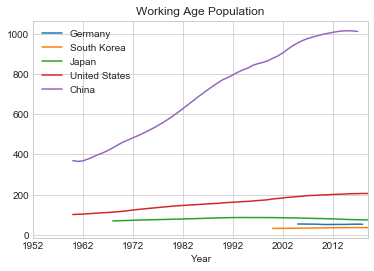

In [38]:
df_countries.plot(title='Working Age Population')

In [39]:
df_temp = df_countries.copy()

In [40]:
# Normalize data
df_temp2 = (df_temp - df_temp.min()) / (df_temp.max() - df_temp.min())

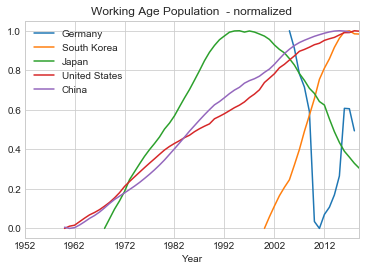

In [41]:
df_temp2.plot(title='Working Age Population  - normalized')

In [42]:
df_temp3 = (df_temp / df_temp.max()) * 100

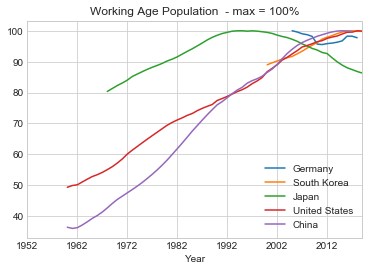

In [43]:
df_temp3.plot(title='Working Age Population  - max = 100%')

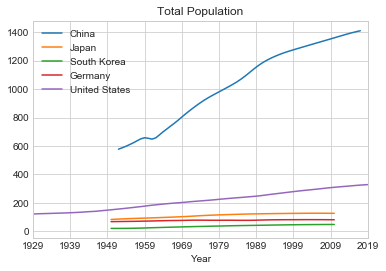

In [44]:
df_countries_total.plot(title='Total Population')

In [45]:
df_countries_total

,China,Japan,South Korea,Germany,United States
Year,,,,,
1929,NaN,NaN,NaN,NaN,121.878
1930,NaN,NaN,NaN,NaN,123.188
1931,NaN,NaN,NaN,NaN,124.149
1932,NaN,NaN,NaN,NaN,124.949
1933,NaN,NaN,NaN,NaN,125.690
...,...,...,...,...,...
2015,1397.028564,NaN,NaN,NaN,320.918
2016,1403.500366,NaN,NaN,NaN,323.186
2017,1409.517456,NaN,NaN,NaN,325.220
